In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

### Cross-validation

In [10]:
# 为什么需要cross validation?
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


In [11]:
scores=[]
for i in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    logreg = LogisticRegression().fit(X_train, y_train)
    scores.append(logreg.score(X_test, y_test))
print("The scores are:",scores)
print("Max scores:",max(scores))
print("Min scores:",min(scores))

The scores are: [0.80000000000000004, 0.83999999999999997, 0.88, 0.95999999999999996, 0.92000000000000004, 0.88, 0.88, 0.95999999999999996, 0.92000000000000004, 0.83999999999999997, 0.92000000000000004, 0.92000000000000004, 0.95999999999999996, 0.92000000000000004, 0.83999999999999997, 0.92000000000000004, 0.88, 0.83999999999999997, 0.95999999999999996, 0.83999999999999997]
Max scores: 0.96
Min scores: 0.8


![](./img/cv.png)

#### Cross-validation in scikit-learn

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target) #default 3 fold
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96078431  0.92156863  0.95833333]


In [13]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [14]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### 分层 K-Fold cross-validation

In [15]:
# issues with traditional splitting
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


![](./img/cv_stratified.png)

In [16]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5)
scores = cross_val_score(logreg,iris.data,iris.target,cv=skf)
print(scores)

[ 1.          0.96666667  0.93333333  0.9         1.        ]


#### leave one out

In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


### group k-fold CV

如果组内数据存在极强关联，那么我们需要采用group k-fold CV。举例来说，如果我们继续人脸表情识别，现在有100人的表情图像数据，每个人的表情数据有多组，因为我们的目标是识别表情，如果采用分层采样那么同一个人的数据可能会出现在训练集以及测试集，对我们的分类系统而言可能会更容易。但是我们想达到的效果是在任何新数据上系统都表现好，所以更好的方式是一部分人的数据出现在训练集，另一部分只出现在测试集。此时就可以采用GroupKFold。

![](./img/cv_group.png)

In [18]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
# 前三条记录属于一组，后面依次类推
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.75        0.8         0.66666667]


### cross-validation参数控制

In [19]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [20]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [21]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.  0.  0.]


In [22]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.9   0.96  0.96]


### Grid Search


#### 网格搜索Grid Search

预测模型有很多Hyper-parameters，如何知道超参数的哪些组合可以达到更好的效果呢？scikit learn提供了网格搜索的算法。只需要设定需要调整的参数和参数的范围，算法会自动验证每一种参数组合的验证效果。

![](./img/gridsearch.jpg)

对SVM的C参数和gamma的网格搜索可视化结果如上图所示，可知{C=1.0，gamma = 0.1}时效果最好。
#### 调参和最终模型

**调参（parameter tuning）**一般先选定一个范围和变化步长，比如(0,1]，步长0.2，这样就有五个参数候选值。然后进行评估，选出最好的一个。这样选出的未必是全局最优的参数，但为了在开销和性能之间折中，只能这么做，毕竟我们无法试尽参数的所有取值。而且多个参数组合的情况是指数上升的，比方说有3个参数，每个参数评估5种取值，就需要测试多达 $5^3$ 种情形。

**特别注意**，训练/验证这个过程是为了让我们**确定学习算法和算法的参数**，确定了这些之后，我们需要再利用整个源数据集进行训练，这次训练所得的模型才是最终模型，也即提交给用户，进行测试的模型。



#### 循环遍历

In [23]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'gamma': 0.001, 'C': 100}


overfitting的风险？我们已经使用了test set!

![](./img/train_validataion.png)

采用validation set后的变化

In [46]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set 
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'gamma': 0.001, 'C': 10}
Test set score with best parameters: 0.92


#### 使用Grid-search + cross-validation

In [47]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

![](./img/cv_process.png)

sklearn里面提供了将grid search和CV集合到一起的功能GridSearchCV

In [48]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [53]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'gamma': 0.01, 'C': 100}
Best cross-validation score: 0.97


In [32]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


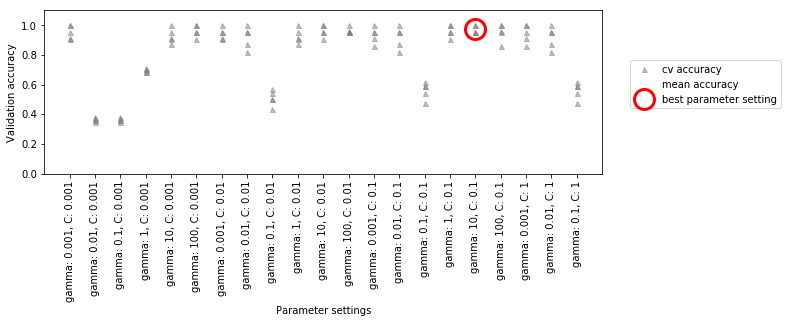

In [54]:
from sklearn.model_selection import GridSearchCV
#mglearn.plots.plot_cross_val_selection()
iris = load_iris()
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data,
                                                              iris.target,
                                                              random_state=0)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_trainval, y_trainval)
results = pd.DataFrame(grid_search.cv_results_)[15:]
best = np.argmax(results.mean_test_score.values)
plt.figure(figsize=(10, 3))
plt.xlim(-1, len(results))
plt.ylim(0, 1.1)
for i, (_, row) in enumerate(results.iterrows()):
    scores = row[['split%d_test_score' % i for i in range(5)]]
    marker_cv, = plt.plot([i] * 5, scores, '^', c='gray', markersize=5, alpha=.5)
    marker_mean, = plt.plot(i, row.mean_test_score, 'v', c='none', alpha=1, markersize=10)
    if i == best:
        marker_best, = plt.plot(i, row.mean_test_score, 'o', c='red', fillstyle="none",
                                alpha=1, markersize=20, markeredgewidth=3)
    plt.xticks(range(len(results)), [str(x).strip("{}").replace("'", "")
                                 for x in grid_search.cv_results_['params']], rotation=90)
plt.ylabel("Validation accuracy")
plt.xlabel("Parameter settings")
plt.legend([marker_cv, marker_mean, marker_best],
           ["cv accuracy", "mean accuracy", "best parameter setting"], loc=(1.05, .4))


#### CV结果分析

In [55]:

results = pd.DataFrame(grid_search.cv_results_)
# Show the first 5 rows
display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000,0.0,0.366071,0.366079,0.001,0.001,"{'gamma': 0.001, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000,0.0,0.011371,0.002852
1,0.002,0.0,0.366071,0.366079,0.001,0.01,"{'gamma': 0.01, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.004,0.0,0.011371,0.002852
2,0.002,0.0,0.366071,0.366079,0.001,0.1,"{'gamma': 0.1, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.004,0.0,0.011371,0.002852
3,0.000,0.0,0.366071,0.366079,0.001,1,"{'gamma': 1, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000,0.0,0.011371,0.002852
4,0.000,0.0,0.366071,0.366079,0.001,10,"{'gamma': 10, 'C': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000,0.0,0.011371,0.002852


In [56]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=None, vmax=None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

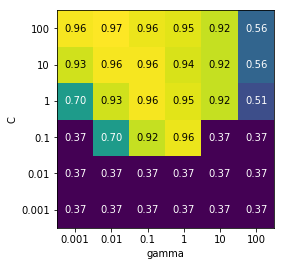

In [57]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation score
heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

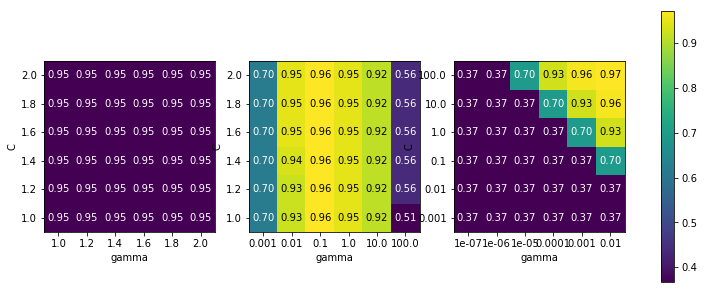

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

In [61]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}, {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}]


In [62]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'gamma': 0.01, 'C': 100, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [38]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0,0,0,0,0.002,0,0,0,0.002,0,...,0,0,0,0,0,0,0,0,0,0
mean_score_time,0,0,0,0,0,0,0,0,0,0,...,0.002,0,0,0,0.002,0,0,0,0.002,0
mean_test_score,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,...,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429,0.946429
mean_train_score,0.984393,0.984393,0.984393,0.988813,0.988813,0.988813,0.986591,0.986591,0.986591,0.988813,...,0.988813,0.988813,0.988813,0.988813,0.986591,0.986591,0.988813,0.988813,0.988813,0.99106
param_C,1,1,1,1,1,1,1.2,1.2,1.2,1.2,...,1.8,1.8,1.8,1.8,2,2,2,2,2,2
param_gamma,1,1.2,1.4,1.6,1.8,2,1,1.2,1.4,1.6,...,1.4,1.6,1.8,2,1,1.2,1.4,1.6,1.8,2
params,"{'gamma': 1.0, 'C': 1.0}","{'gamma': 1.2, 'C': 1.0}","{'gamma': 1.4, 'C': 1.0}","{'gamma': 1.6, 'C': 1.0}","{'gamma': 1.8, 'C': 1.0}","{'gamma': 2.0, 'C': 1.0}","{'gamma': 1.0, 'C': 1.2}","{'gamma': 1.2, 'C': 1.2}","{'gamma': 1.4, 'C': 1.2}","{'gamma': 1.6, 'C': 1.2}",...,"{'gamma': 1.4, 'C': 1.8}","{'gamma': 1.6, 'C': 1.8}","{'gamma': 1.8, 'C': 1.8}","{'gamma': 2.0, 'C': 1.8}","{'gamma': 1.0, 'C': 2.0}","{'gamma': 1.2, 'C': 2.0}","{'gamma': 1.4, 'C': 2.0}","{'gamma': 1.6, 'C': 2.0}","{'gamma': 1.8, 'C': 2.0}","{'gamma': 2.0, 'C': 2.0}"
rank_test_score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
split0_test_score,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
split0_train_score,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,...,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636,0.988636


#### 嵌套CV

前面我们进行只是对数据进行一次拆分（训练，验证，测试），然后在训练数据上进行CV。利用GridSearchCV时因为我们只是在一次拆分上进心，显然这样获得的结果并不稳定，它明显依赖这一次拆分。那么我们可以更进一步，在训练测试数据的拆分上也进行CV，这样就产生了嵌套CV。外循环进行训练测试集拆分，而每一次拆分我们又进行了grid search（可能每次产生的最佳参数不同）。而针对每次外循环，返回最佳结果

嵌套CV得到的不是一个模型或者参数，而是一系列的模型评分，这个评分告诉我们grid search获得最佳参数的模型的泛化能力。不过因为嵌套CV只是返回评分，所以很少使用，通常只是用来来评估模型。

In [63]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.96666667  1.          0.9         0.96666667  1.        ]
Mean cross-validation score:  0.966666666667


这里的嵌套CV可以解读为“SVC在iris这个数据集上可以获得97% 的平均 CV accuracy”。不过需要注意这里我们构建了 $36*5*5$=900个模型
